# Isolation Forest, synthetic data and scores

In [1]:
import json

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from pyod.models.iforest import IForest

In [2]:
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

In [3]:
BASE_COLOR = config['base_color']
LIGHT_COLOR = config['light_color']
DPI = config['dpi']
EDGE_COLOR = config['edge_color']
AXIS_COLOR = config['axis_color']
GRID_COLOR = config['grid_color']
FORMAT = config['format']

In [4]:
palette = f"blend:{BASE_COLOR},{LIGHT_COLOR}"

In [5]:
rc = {'axes.edgecolor': AXIS_COLOR,
      'axes.labelcolor': AXIS_COLOR,
      'grid.linestyle': '--',
      'text.color': AXIS_COLOR,
      'xtick.color': AXIS_COLOR,
      'ytick.color': AXIS_COLOR,
      'grid.color': GRID_COLOR}

In [6]:
sns.set(font_scale=2)
sns.set_style("whitegrid", rc=rc)
sns.set_context("talk")

In [7]:
np.random.seed(42)

In [8]:
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]
offset = 3

In [9]:
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

In [10]:
X1 = 0.5 * np.random.randn(n_inliers) + offset
X2 = 0.5 * np.random.randn(n_inliers) - offset

In [11]:
outliers_1 = np.random.uniform(low=-6, high=6, size=(n_outliers))
outliers_2 = np.random.uniform(low=-6, high=6, size=(n_outliers))

In [12]:
data = pd.concat([pd.DataFrame({'попугаи': X1, 'удавы': X2}), 
                  pd.DataFrame({'попугаи': outliers_1, 'удавы': outliers_2})]).reset_index(drop=True)

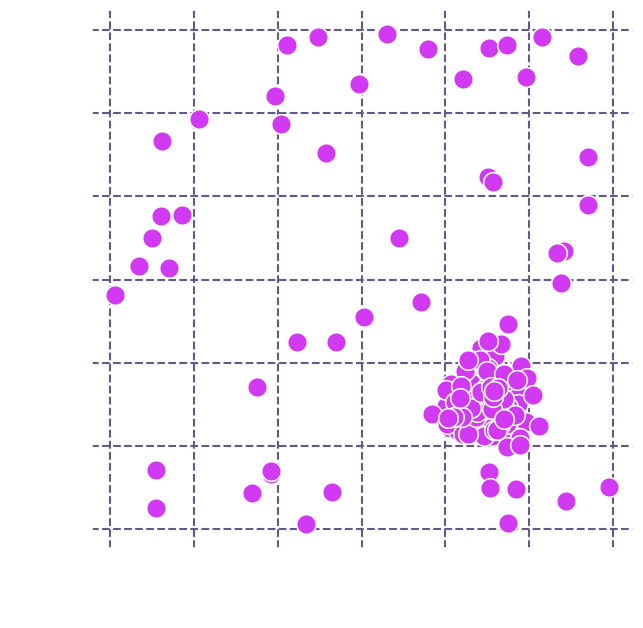

In [13]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data, x='попугаи', y='удавы', color=BASE_COLOR, s=200, edgecolor=EDGE_COLOR)
plt.savefig(f"images/synthetic_data.{FORMAT}", transparent=True, dpi=DPI)

In [14]:
clf = IForest(contamination=0.25)

In [15]:
clf.fit(data)

IForest(behaviour='old', bootstrap=False, contamination=0.25,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=None, verbose=0)

In [16]:
scores = pd.Series(clf.decision_scores_, name='индекс аномальности')

In [17]:
data.head(10)

,попугаи,удавы
0,3.248357,-2.874754
1,2.930868,-2.826776
2,3.323844,-3.340012
3,3.761515,-2.883873
4,2.882923,-2.853464
5,2.882932,-3.357176
6,3.789606,-2.067113
7,3.383717,-2.763084
8,2.765263,-3.595652
9,3.271280,-2.671723


In [18]:
scores.head(10)

0   -0.119150
1   -0.131275
2   -0.108670
3   -0.065472
4   -0.128972
5   -0.120056
6   -0.012170
7   -0.112723
8   -0.101008
9   -0.117487
Name: индекс аномальности, dtype: float64

In [19]:
data['scores'] = scores

In [20]:
data.sort_values(by='scores', ascending=False).head(10)

,попугаи,удавы,scores
171,-5.869948,-0.376072,0.206049
154,5.886062,-4.981947,0.204401
159,5.169088,5.366983,0.195944
186,-4.905527,-5.482081,0.190407
151,-3.870725,3.862321,0.185113
170,-1.329580,-5.863756,0.183137
176,5.407286,2.952539,0.173851
160,4.300953,5.832013,0.169331
164,-4.762514,3.325763,0.166937
173,-4.904560,-4.574185,0.164269


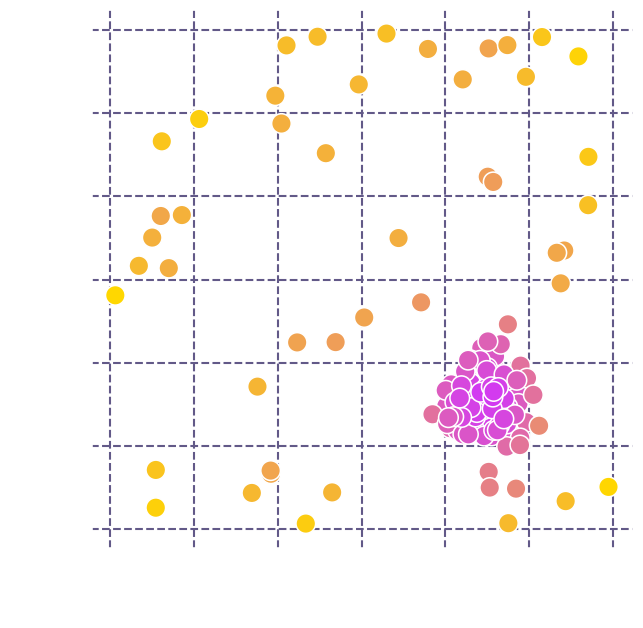

In [21]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data, x='попугаи', y='удавы', s=200, edgecolor=EDGE_COLOR, 
                palette=palette, hue='scores', legend=False)
plt.savefig(f"images/synthetic_data_scores.{FORMAT}", transparent=True, dpi=DPI)

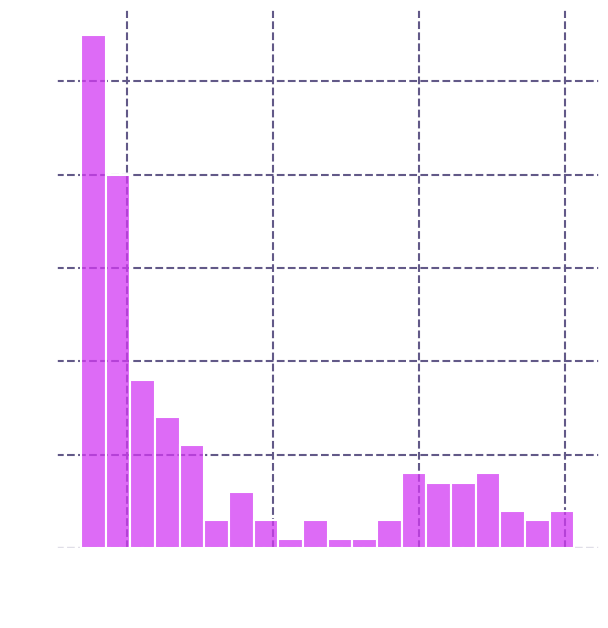

In [22]:
plt.figure(figsize=(7, 7))
ax = sns.histplot(scores, color=BASE_COLOR, edgecolor=EDGE_COLOR, bins=20)
ax.set(ylabel='')
plt.savefig(f"images/anomaly_score_histogram.{FORMAT}", transparent=True, dpi=DPI)

In [23]:
y_pred = clf.predict(data[['попугаи', 'удавы']])

/home/michael/git/phd-2025-anomaly-detection/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


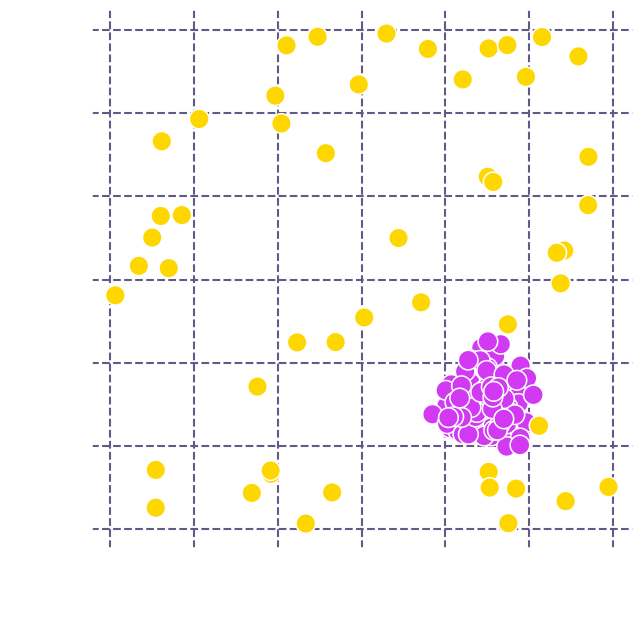

In [24]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data, x='попугаи', y='удавы', s=200, edgecolor=EDGE_COLOR, 
                palette=palette, hue=y_pred, legend=False)
plt.savefig(f"images/synthetic_data_decision.{FORMAT}", transparent=True, dpi=DPI)

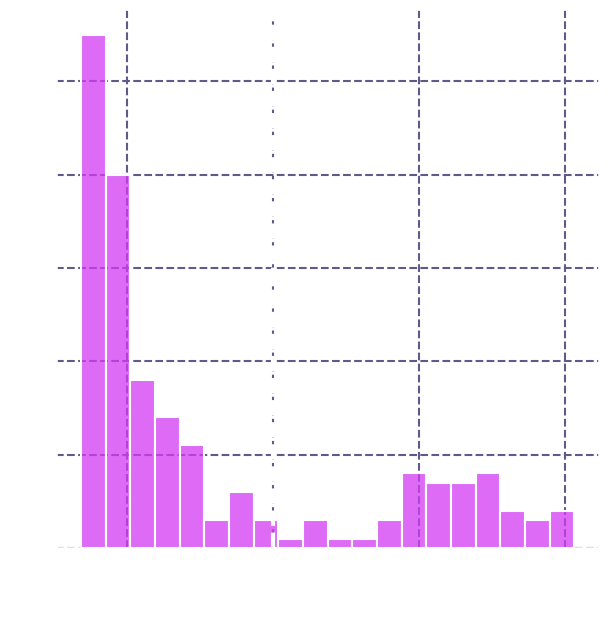

In [25]:
plt.figure(figsize=(7, 7))
ax = sns.histplot(scores, color=BASE_COLOR, edgecolor=EDGE_COLOR, bins=20)
plt.axvline(clf.threshold_, linestyle='--', color=AXIS_COLOR, linewidth=3)
ax.set(ylabel='')
plt.savefig(f"images/anomaly_score_histogram_threshold.{FORMAT}", transparent=True, dpi=DPI)